In [3]:
a=["a","b","c","d"]
b=[1,2,3,4]


b


[1, 2, 3, 4]

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


[('2015.01.05.', 3514.0), ('2015.01.06.', 3420.0), ('2015.01.07.', 3429.0), ('2015.01.08.', 3425.0), ('2015.01.09.', 3360.0), ('2015.01.12.', 3390.0), ('2015.01.13.', 3364.0), ('2015.01.14.', 3396.0), ('2015.01.15.', 3395.0), ('2015.01.16.', 3445.0), ('2015.01.19.', 3411.0), ('2015.01.20.', 3532.0), ('2015.01.21.', 3602.0), ('2015.01.22.', 3785.0), ('2015.01.23.', 3775.0), ('2015.01.26.', 3789.0), ('2015.01.27.', 3850.0), ('2015.01.28.', 3860.0), ('2015.01.29.', 3775.0), ('2015.01.30.', 3740.0), ('2015.02.02.', 3750.0), ('2015.02.03.', 3898.0), ('2015.02.04.', 3845.0), ('2015.02.05.', 3756.0), ('2015.02.06.', 3825.0), ('2015.02.09.', 3860.0), ('2015.02.10.', 3785.0), ('2015.02.11.', 3680.0), ('2015.02.12.', 3805.0), ('2015.02.13.', 3822.0), ('2015.02.16.', 3750.0), ('2015.02.17.', 3780.0), ('2015.02.18.', 3945.0), ('2015.02.19.', 3900.0), ('2015.02.20.', 3900.0), ('2015.02.23.', 3985.0), ('2015.02.24.', 3990.0), ('2015.02.25.', 4025.0), ('2015.02.26.', 4000.0), ('2015.02.27.', 3930.0),

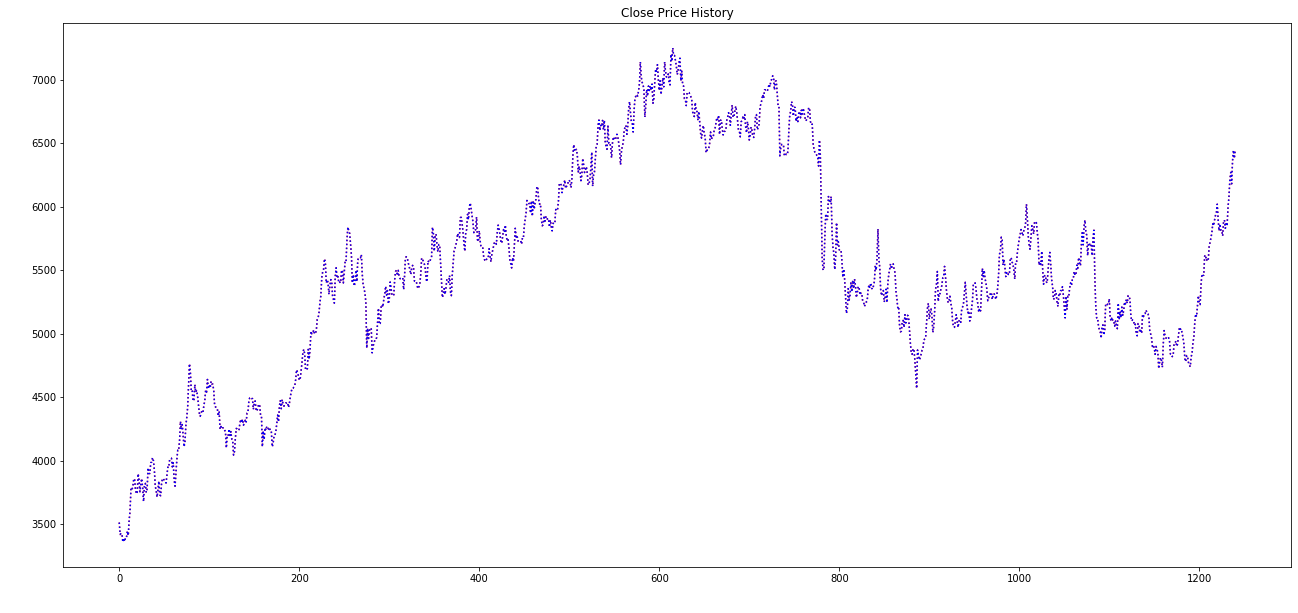

In [7]:
import matplotlib.pyplot as plt
rg=open("/content/drive/My Drive/bet/historikus_2015_01_01__2019_12_29_.csv")
Richter=[]
Datum=[]
Zaro=[]
Nyito=[]
for l in rg:
    l=l.strip()
    Rx=l.split(",")
    #print(Rx)
    Richter.append(Rx)
    Datum.append(Rx[1])
    Zaro.append(Rx[5])
    Nyito.append(Rx[5])
    
Zaro=Zaro[1:]
Nyito=Nyito[1:]

t=[]
for i in Zaro:
    t.append(float(i))
Zaro=t

t=[]
for i in Nyito:
    t.append(float(i))
Nyito=t


Datum=Datum[1:]
#print(Zaro)


plt.figure(figsize=(22,10))
graf=list(zip(Datum,Zaro))
print(graf)
plt.title('Close Price History')
plt.plot(Nyito,":r",Zaro,":b")
#plt.axes(fc="white")
plt.xlabel("Datum", fontsize=18, color="white")
plt.ylabel('Close Price HUF (Ft)', fontsize=22, color="white")
plt.show()

In [48]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

#Split the data into x_train and y_train data sets
x_train = []
y_train = []
train_data=Zaro
#print(train_data[0:60])
print("itt vagyink_")
for i in range(60, len(train_data)):
     #print(i)
    x_train.append(train_data[i-60:i])
    y_train.append(train_data[i]) 
    #if i<= 61:
       # print(x_train)
        #print(y_train)
        #print()

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(x_train)
scaled_out = scaler.fit_transform(y_train)



x_train, y_train = np.array(x_train), np.array(y_train)


x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))

print(x_train.shape)
print(x_train)



#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(60,1)))
model.add(LSTM(50, return_sequences= False))
#model.add(Dense(25)) # orig
#model.add(Dense(45))

model.add(Dense(1))
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


#Train the model
print(x_train)
print(y_train)
model.fit(x_train, y_train, batch_size=1, epochs=1)



itt vagyink_


ValueError: ignored